In [1]:
# パッケージ
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, SimpleRNN, GRU
from keras import optimizers
from keras.callbacks import EarlyStopping

2023-05-24 22:09:41.407266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 22:09:41.983969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
target_data = pd.read_csv("./target/target_USDJPY.csv")
#----OPTIONS----
unitsRNN      = 120
learning_rate = 0.0001
patience      = 10
epochs        = 2000
batch_size    = 60
maxlen = 120
print(target_data["date"].values[0])

2015.01.02


In [3]:
'''
1. データの準備
'''

# x = [target_data["deviation_rate"][i:i+maxlen].values for i in range(59, len(target_data["deviation_rate"].values[:])-maxlen)]
x = []
for i in range(59, len(target_data["deviation_rate"].values[:])-maxlen):
    ilist = pd.DataFrame(data={
        "deviation_rate": target_data["deviation_rate"][i:i+maxlen].values,
        "high": target_data["high"][i:i+maxlen].values,
        "low": target_data["low"][i:i+maxlen].values
    })
    x.append(ilist)
t = [target_data["rise_rate"][i+maxlen-1] for i in range(59, len(target_data["rise_rate"].values[:])-maxlen)]

x = np.array(x).reshape(-1, maxlen, 1)
t = np.array(t).reshape(-1, 1)
print(x.shape, t.shape)

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.2, shuffle=False)

(18132, 120, 1) (18132, 1)


In [4]:
'''
2. モデルの構築
'''
model = Sequential()
model.add(LSTM(unitsRNN, activation='tanh',
                recurrent_activation='sigmoid',
                kernel_initializer='he_normal',
                recurrent_initializer='orthogonal'))
model.add(Dense(1, activation='linear'))
model.add(Activation('sigmoid'))

2023-05-24 22:09:43.563632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 22:09:43.581242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 22:09:43.581312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 22:09:43.583580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 22:09:43.583659: I tensorflow/compile

In [5]:
'''
3. モデルの学習
'''
optimizer = optimizers.Adam(learning_rate=learning_rate,
                              beta_1=0.9, beta_2=0.999, amsgrad=True)

model.compile(optimizer=optimizer,
            loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss',
                patience=patience,
                verbose=1)

hist = model.fit(x_train, t_train,
                epochs=epochs, batch_size=batch_size,
                verbose=2,
                validation_data=(x_val, t_val),callbacks=[es])

Epoch 1/2000


2023-05-24 22:09:45.062334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-24 22:09:45.065180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-24 22:09:45.067205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

242/242 - 7s - loss: 0.2475 - val_loss: 0.2428 - 7s/epoch - 29ms/step
Epoch 2/2000
242/242 - 4s - loss: 0.2475 - val_loss: 0.2412 - 4s/epoch - 17ms/step
Epoch 3/2000
242/242 - 4s - loss: 0.2474 - val_loss: 0.2421 - 4s/epoch - 18ms/step
Epoch 4/2000
242/242 - 4s - loss: 0.2473 - val_loss: 0.2409 - 4s/epoch - 17ms/step
Epoch 5/2000
242/242 - 4s - loss: 0.2472 - val_loss: 0.2400 - 4s/epoch - 17ms/step
Epoch 6/2000
242/242 - 4s - loss: 0.2471 - val_loss: 0.2437 - 4s/epoch - 17ms/step
Epoch 7/2000
242/242 - 4s - loss: 0.2471 - val_loss: 0.2431 - 4s/epoch - 16ms/step
Epoch 8/2000
242/242 - 4s - loss: 0.2469 - val_loss: 0.2406 - 4s/epoch - 17ms/step
Epoch 9/2000
242/242 - 4s - loss: 0.2468 - val_loss: 0.2404 - 4s/epoch - 16ms/step
Epoch 10/2000
242/242 - 4s - loss: 0.2469 - val_loss: 0.2412 - 4s/epoch - 17ms/step
Epoch 11/2000
242/242 - 4s - loss: 0.2467 - val_loss: 0.2435 - 4s/epoch - 17ms/step
Epoch 12/2000
242/242 - 4s - loss: 0.2468 - val_loss: 0.2396 - 4s/epoch - 16ms/step
Epoch 13/2000


 19/567 [>.............................] - ETA: 3s

2023-05-24 22:14:58.204514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-24 22:14:58.206693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-24 22:14:58.207862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

567/567 [==============================] - 4s 6ms/step


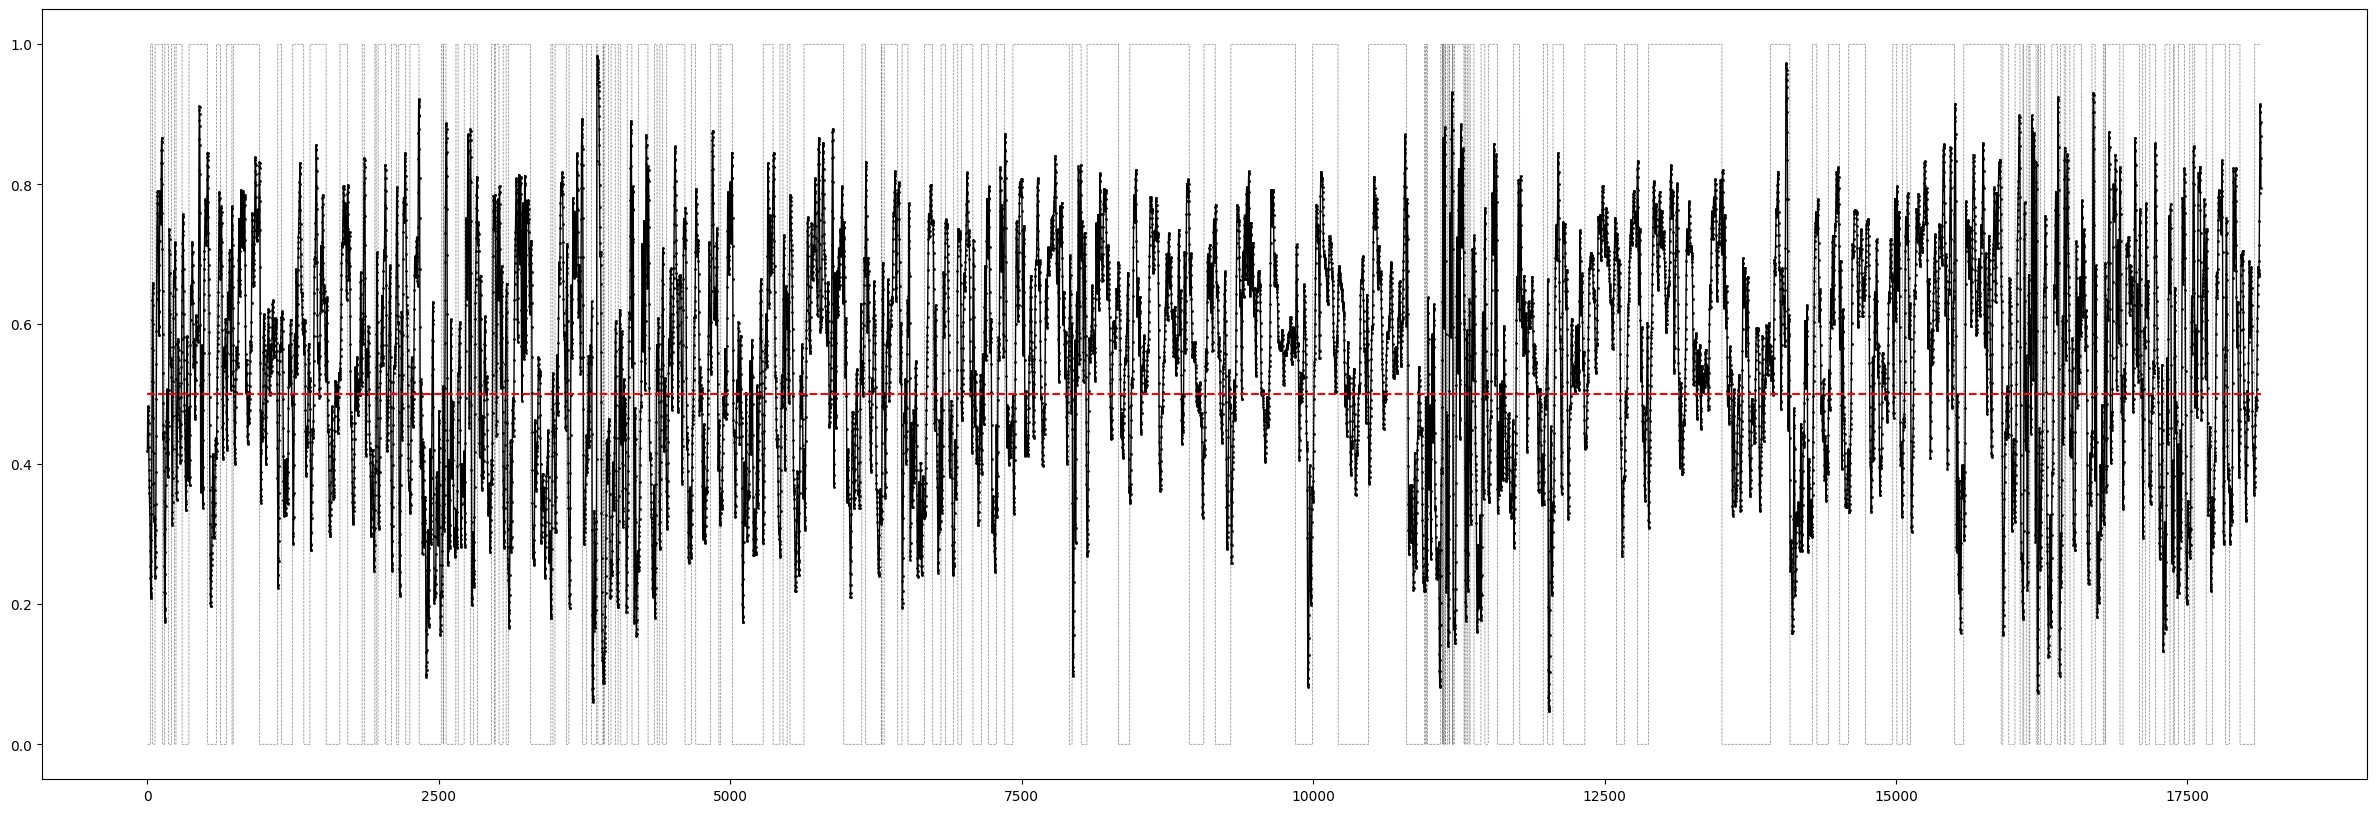

In [6]:
'''
4. モデルの評価
'''
indata = t
predicted = []

preds = model.predict(x)
for i in range(len(preds)):
    predicted.append(preds[i])


# 予測値を可視化
fig = plt.figure(figsize=(30, 10))
plot_length = len(predicted)
plt.plot(range(plot_length), indata[:plot_length],
        color='gray',
        linestyle='--', linewidth=0.5)
plt.plot(range(plot_length), predicted[:plot_length],
        color='black', linewidth=1,
        marker='o', markersize=1, markerfacecolor='black',
        markeredgecolor='black')
plt.plot([0, plot_length],[0.5, 0.5], "red", linestyle='dashed')
plt.show()

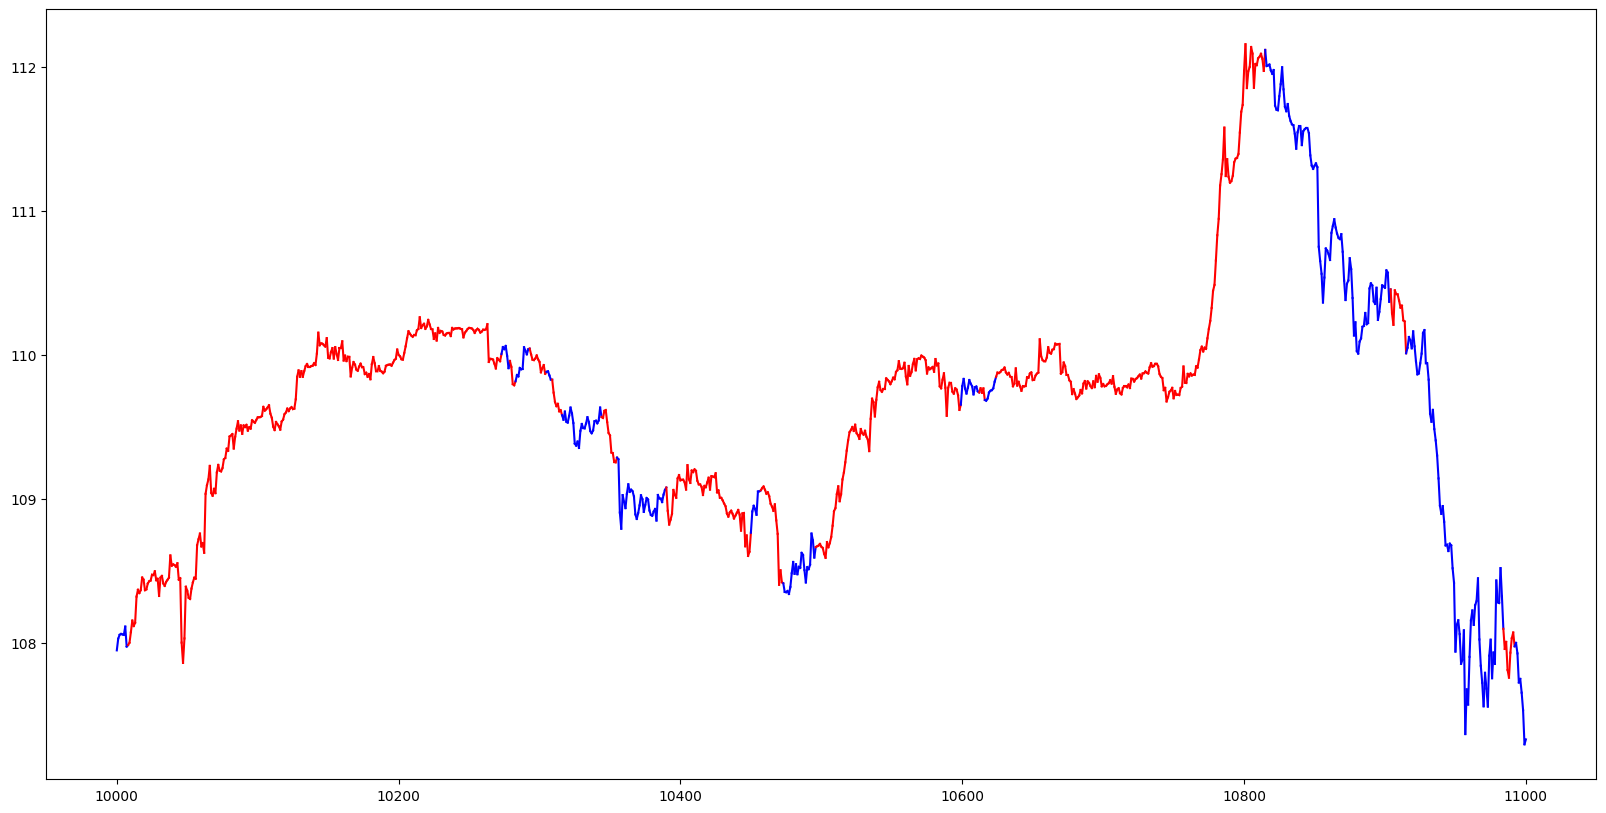

In [8]:
# 実データに反映し描画
chart = [target_data["close"][i+maxlen-1] for i in range(59, len(target_data["close"].values[:])-maxlen)]
fig = plt.figure(figsize=(20,10))
plot_length = len(chart)
for i in range(10000,11000):
    plt.plot(range(plot_length+1)[i:i+2], chart[i:i+2], color= 'red' if predicted[i] > 0.5 else 'blue')
plt.show()

In [9]:
# 売買シミュレーション
#---OPTIONS---
total   = 100000     # 初期金額
per     = 0.1       # 1回の投資金額
per_lot = 100000     # 1ロット当たりの通貨数
leverage = 100        # レバレッジ(整数)
losscut = 0.997     # ロスカットする比率
position = None     # ポジションの状態（"Buy","Sell",None）買い,売り,無し
position_data = None  # 現在のポジションの情報[index, 取引時価格, lot数]
recent_position = None # 直近のポジション
result_history = [] # シミュレーションの結果を記録
win     = 0         # ポジションを変更したときに利益がプラスの回数
lose    = 0         # ポジションを変更したときに利益がマイナスの回数
tax     = 0         # 支払った税金
lscount = 0         # ロスカットの回数

chart = [target_data["close"][i+maxlen-1] for i in range(59, len(target_data["close"].values[:])-maxlen)]
chart_high = [target_data["high"][i+maxlen-1] for i in range(59, len(target_data["high"].values[:])-maxlen)]
chart_low = [target_data["low"][i+maxlen-1] for i in range(59, len(target_data["low"].values[:])-maxlen)]
for i in range(0, len(predicted)):
    flag_losscut = False
    # ロスカット計算
    if position in ["Buy", "Sell"]:
        if position == "Buy":
            if position_data[1] * losscut > chart_low[i]:
                #total += (chart[i] - position_data[1]) * position_data[2] * per_lot
                total -= position_data[1] * (1-losscut) * position_data[2] * per_lot
                print(position_data[1] * (1-losscut) * position_data[2] * per_lot)
                flag_losscut = True
        
        elif position == "Sell":
            if position_data[1] * (2-losscut) < chart_high[i]:
                #total += (position_data[1] - chart[i]) * position_data[2] * per_lot
                total -= position_data[1] * (1-losscut) * position_data[2] * per_lot
                flag_losscut = True
    
    # ロスカットがなければ取引実行
    if not flag_losscut:
        if position == None:
            if predicted[i] > 0.5:
                position = "Buy"
            else:
                position = "Sell"
            # if predicted[i] > 0.5 and recent_position != "Buy":
            #     position = "Buy"
            # elif recent_position != "Sell":
            #     position = "Sell"
                
            # 何ロット？
            lots = (total * per * leverage / chart[i]) / per_lot
            position_data = [i, chart[i], lots]
                
        elif position == "Buy":
            if predicted[i] < 0.5 or (chart[i] - position_data[1])/position_data[1] > 0.01:
                # 直前のポジションを決済
                profit = (chart[i] - position_data[1]) * position_data[2] * per_lot
                total += profit
                if profit > 0:
                    win += 1
                else:
                    lose += 1
                position = "Sell"
                # 何ロット？
                lots = (total * per * leverage / chart[i]) / per_lot
                position_data = [i, chart[i], lots]
                
        elif position == "Sell":
            if predicted[i] > 0.5 or (position_data[1] - chart[i])/position_data[1] > 0.01:
                # 直前のポジションを決済
                profit =(position_data[1] - chart[i]) * position_data[2] * per_lot
                total += profit
                if profit > 0:
                    win += 1
                else:
                    lose += 1
                position = "Buy"
                # 何ロット？
                lots = (total * per * leverage / chart[i]) / per_lot
                position_data = [i, chart[i], lots]
        else:
            print(ValueError)
    else:
        # print("losscut")
        recent_position = position
        position = None
        lose += 1
        lscount += 1
    
    # 記録
    result_history.append(total)

print(f"勝利：{win}")
print(f"敗北：{lose}")
print(f"ロスカット{lscount}")
print(f"最終金額：{total}")

3107.8212620324707
3014.5866241714966
3111.534271628874
3018.1882434800077
2927.642596175607
2839.81331829034
2577.1398788664706
2499.825682500477
2287.124320951137
2141.9194289409834
1988.6369518117256
1902.430917169902
1989.8733675845847
1893.3606885520767
2026.7460924306172
1965.9437096576992
1906.9653983679677
1896.7437363322026
1763.3053601808522
1889.8081143826698
1833.1138709511897
1928.549320406318
2101.064898899635
1940.6823197158758
1823.766635179078
1769.0536361237062
1614.567489241931
1581.6223615586814
1635.058932134599
1607.9064622694511
1826.4242603448336
1771.6315325344879
1742.526423281446
1891.6599376427496
1834.9101395134671
1779.8628353280628
1691.2892153705916
1684.3347181671033
1562.8884774600767
1516.0018231362742
1472.9902032096238
1428.8004971133348
1417.977623161019
1289.97298197375
1386.153956496074
1341.4982462891683
1262.2156999334784
2394.95901017824
2323.110239872893
2253.4169326767064
2700.186700673306
3026.6441953847475
3000.1200859876853
2734.481442329

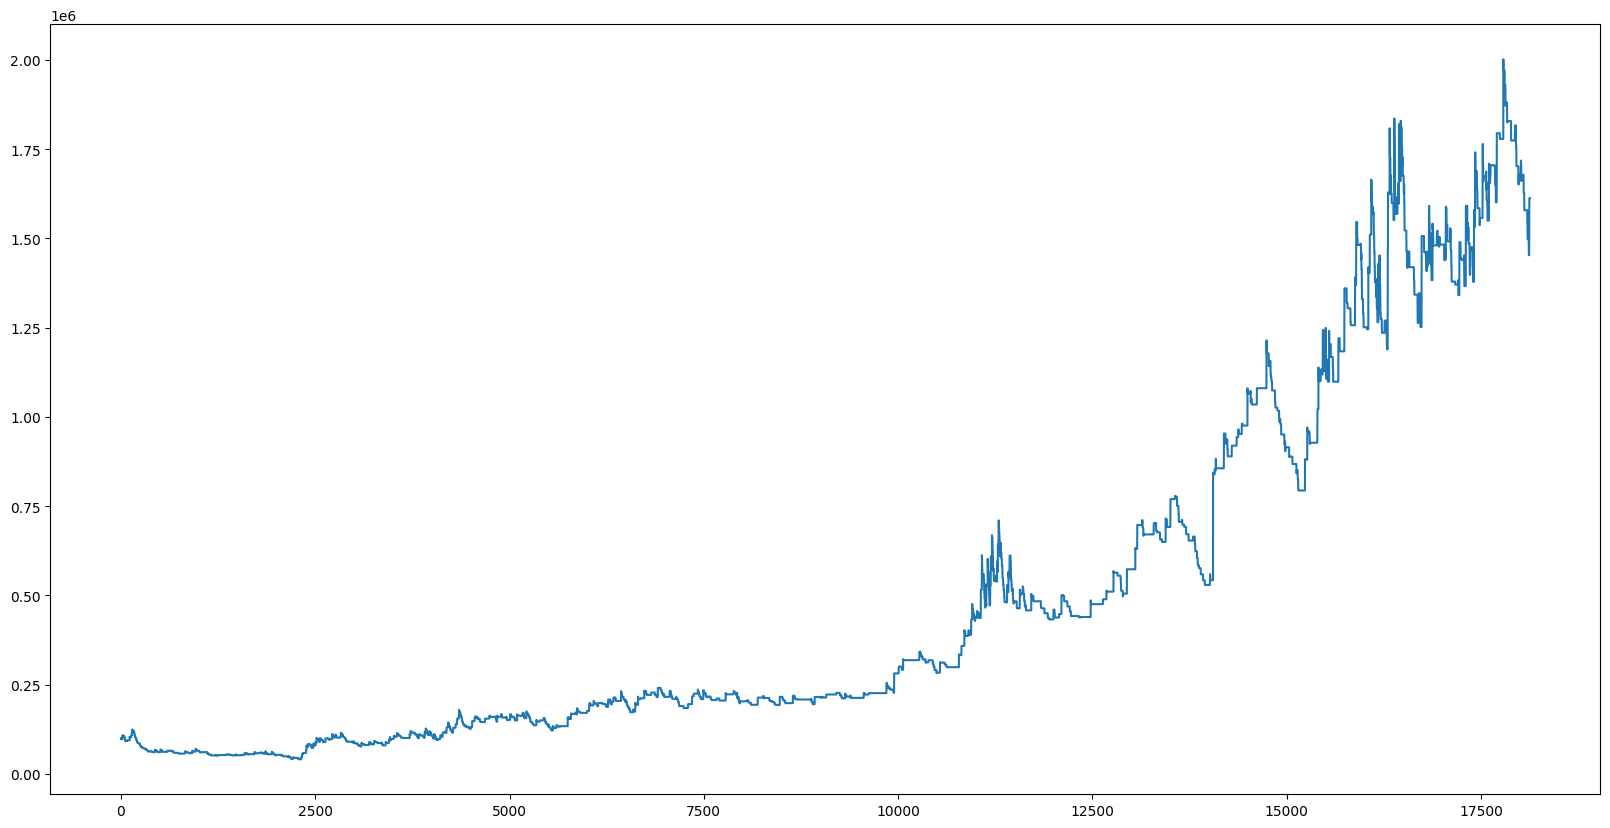

In [10]:
# シミュレーションの推移
fig = plt.figure(figsize=(20,10))
plt.plot(result_history)
plt.show()

In [ ]:
# # 保存先がなければ作成
# dir_path = f"../models"
# dir = Path(dir_path)
# dir.mkdir(parents=True, exist_ok=True)
# # 現在の日時をつけて保存
# today = datetime.now()
# file_name = today.strftime("%Y%m%d_%H%M%S")
# model.save(f"{dir_path}/model{maxlen}_{file_name}.h5")